<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cost-curve-investigation" data-toc-modified-id="Cost-curve-investigation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Cost curve investigation</a></span><ul class="toc-item"><li><span><a href="#Baseline-baseline" data-toc-modified-id="Baseline-baseline-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Baseline baseline</a></span></li><li><span><a href="#Cost-curve-evolution" data-toc-modified-id="Cost-curve-evolution-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Cost curve evolution</a></span></li><li><span><a href="#One-cost-curve-detail" data-toc-modified-id="One-cost-curve-detail-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>One cost curve detail</a></span></li><li><span><a href="#Evolution-of-average-costs" data-toc-modified-id="Evolution-of-average-costs-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Evolution of average costs</a></span></li></ul></li><li><span><a href="#Cobalt-behavior-under-different-shocks" data-toc-modified-id="Cobalt-behavior-under-different-shocks-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cobalt behavior under different shocks</a></span><ul class="toc-item"><li><span><a href="#Baseline-and-scenarios" data-toc-modified-id="Baseline-and-scenarios-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Baseline and scenarios</a></span></li><li><span><a href="#Cobalt-mining-response" data-toc-modified-id="Cobalt-mining-response-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Cobalt mining response</a></span><ul class="toc-item"><li><span><a href="#Old-mines" data-toc-modified-id="Old-mines-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Old mines</a></span></li><li><span><a href="#New-mines" data-toc-modified-id="New-mines-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>New mines</a></span></li></ul></li><li><span><a href="#Cobalt-co-producing-mines-on-the-cost-curve" data-toc-modified-id="Cobalt-co-producing-mines-on-the-cost-curve-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Cobalt co-producing mines on the cost curve</a></span></li></ul></li><li><span><a href="#Tellurium-(refinery-behavior)-under-different-shocks" data-toc-modified-id="Tellurium-(refinery-behavior)-under-different-shocks-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tellurium (refinery behavior) under different shocks</a></span><ul class="toc-item"><li><span><a href="#Baseline-and-scenarios" data-toc-modified-id="Baseline-and-scenarios-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Baseline and scenarios</a></span></li><li><span><a href="#Primary-mining-displacement" data-toc-modified-id="Primary-mining-displacement-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Primary mining displacement</a></span></li><li><span><a href="#Primary-refined-displacement" data-toc-modified-id="Primary-refined-displacement-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Primary refined displacement</a></span></li><li><span><a href="#Secondary-refined-displacement" data-toc-modified-id="Secondary-refined-displacement-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Secondary refined displacement</a></span></li><li><span><a href="#All-cathode-production-displacement" data-toc-modified-id="All-cathode-production-displacement-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>All cathode production displacement</a></span></li><li><span><a href="#Refined-usage-displacement" data-toc-modified-id="Refined-usage-displacement-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Refined usage displacement</a></span></li><li><span><a href="#Direct-melt-displacement" data-toc-modified-id="Direct-melt-displacement-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Direct melt displacement</a></span></li><li><span><a href="#All-demand-displacement" data-toc-modified-id="All-demand-displacement-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>All demand displacement</a></span></li><li><span><a href="#Supply-potentials" data-toc-modified-id="Supply-potentials-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Supply potentials</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
idx = pd.IndexSlice
import random 
from scipy import stats

from mine_simulation_tools import *
from cost_curve_tools import *

# Cost curve investigation

## Baseline baseline

In [2]:
mine_life_baseline_baseline_tp=pd.read_excel('Data/scenario results/Mine level info/mine life baseline_baseline.xlsx', 
                                          sheet_name='Sheet1', index_col=[0, 1])
mine_life_baseline_baseline=mine_life_baseline_baseline_tp.transpose()

In [3]:
price_baseline_baseline=pd.read_excel('Data/scenario results/price baseline_baseline.xlsx', sheet_name='Sheet1', index_col=0)

## Cost curve evolution

In [4]:
cc_18=cost_curve_df(2018, mine_life_baseline_baseline)
cc_25=cost_curve_df(2025, mine_life_baseline_baseline)
cc_30=cost_curve_df(2030, mine_life_baseline_baseline)
cc_35=cost_curve_df(2035, mine_life_baseline_baseline)
cc_40=cost_curve_df(2040, mine_life_baseline_baseline)

<IPython.core.display.Javascript object>


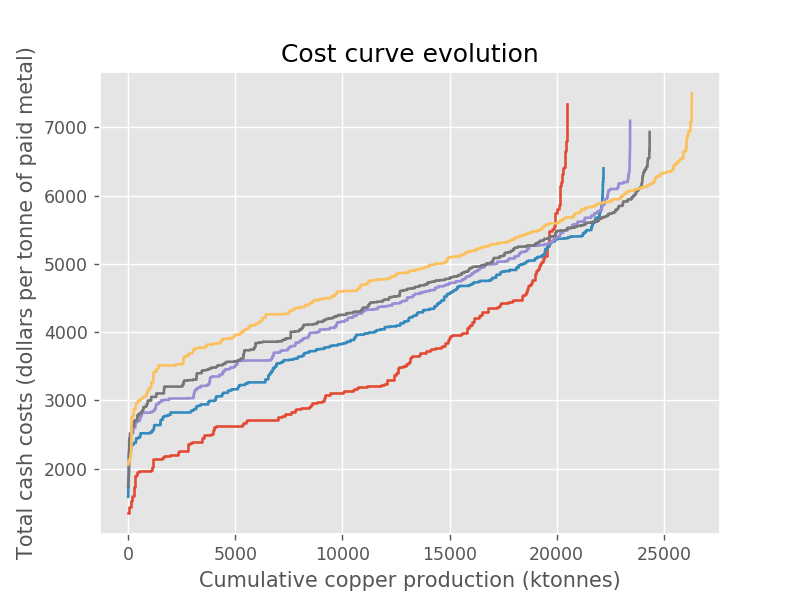

In [5]:
%matplotlib notebook
plt.style.use('ggplot')
plt.step(cc_18.loc[:, 'Cumulative production'].shift(1).fillna(0), cc_18.loc[:, 'Total cost'], where='post')
plt.step(cc_25.loc[:, 'Cumulative production'].shift(1).fillna(0), cc_25.loc[:, 'Total cost'], where='post')
plt.step(cc_30.loc[:, 'Cumulative production'].shift(1).fillna(0), cc_30.loc[:, 'Total cost'], where='post')
plt.step(cc_35.loc[:, 'Cumulative production'].shift(1).fillna(0), cc_35.loc[:, 'Total cost'], where='post')
plt.step(cc_40.loc[:, 'Cumulative production'].shift(1).fillna(0), cc_40.loc[:, 'Total cost'], where='post')

plt.xlabel('Cumulative copper production (ktonnes)')
plt.ylabel('Total cash costs (dollars per tonne of paid metal)')

plt.title('Cost curve evolution')
plt.show()

## One cost curve detail

In [6]:
x_pos=cc_18.loc[:, 'Cumulative production'].shift(1).fillna(0)
width=cc_18.loc[:, 'Cumulative production'].diff().fillna(cc_18.loc[:, 'Cumulative production'].iloc[0])
minesite=cc_18.loc[:, 'Minsite cost ($/tonne paid metal)']
freight=cc_18.loc[:, 'Frieght ($/tonne paid metal)']
tcrc=cc_18.loc[:, 'TCRC ($/tonne paid metal)']
royalty=cc_18.loc[:, 'Royalty ($/tonne paid metal)']
cathode_price=price_baseline_baseline.loc['20180101', 'Cathode']

<IPython.core.display.Javascript object>


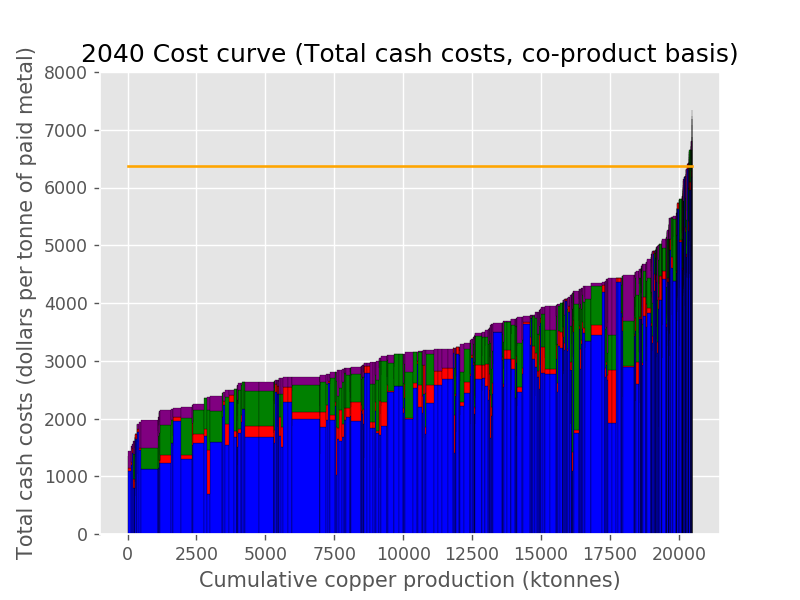

In [7]:
%matplotlib notebook
plt.bar(x_pos, minesite, color='b', align='edge', edgecolor='black', width=width, linewidth=0.15,
        label='Minesite')
plt.bar(x_pos, freight, color='r', align='edge', edgecolor='black', width=width, bottom=minesite, linewidth=0.15,
        label='Freight')
plt.bar(x_pos, tcrc, color='g', align='edge', edgecolor='black', width=width, bottom=minesite+freight, linewidth=0.15,
        label='TCRC')
plt.bar(x_pos, royalty, color='purple', align='edge', edgecolor='black', width=width, bottom=minesite+freight+tcrc, linewidth=0.15,
        label='Royalty')

plt.plot([0, x_pos.iloc[-1]], [cathode_price, cathode_price], color='orange')
plt.title('2040 Cost curve (Total cash costs, co-product basis)')
plt.xlabel('Cumulative copper production (ktonnes)')
plt.ylabel('Total cash costs (dollars per tonne of paid metal)')
plt.axis([-1000, x_pos.iloc[-1]+1000, 0, 8000])
#plt.legend()
plt.show()

## Evolution of average costs

In [8]:
cost_series_median=cost_percentile_series(mine_life_baseline_baseline, percentile=50)
cost_series_25=cost_percentile_series(mine_life_baseline_baseline, percentile=25)
cost_series_75=cost_percentile_series(mine_life_baseline_baseline, percentile=75)
cost_series_90=cost_percentile_series(mine_life_baseline_baseline,percentile = 90)
cost_series_10=cost_percentile_series(mine_life_baseline_baseline,percentile = 10)

<IPython.core.display.Javascript object>


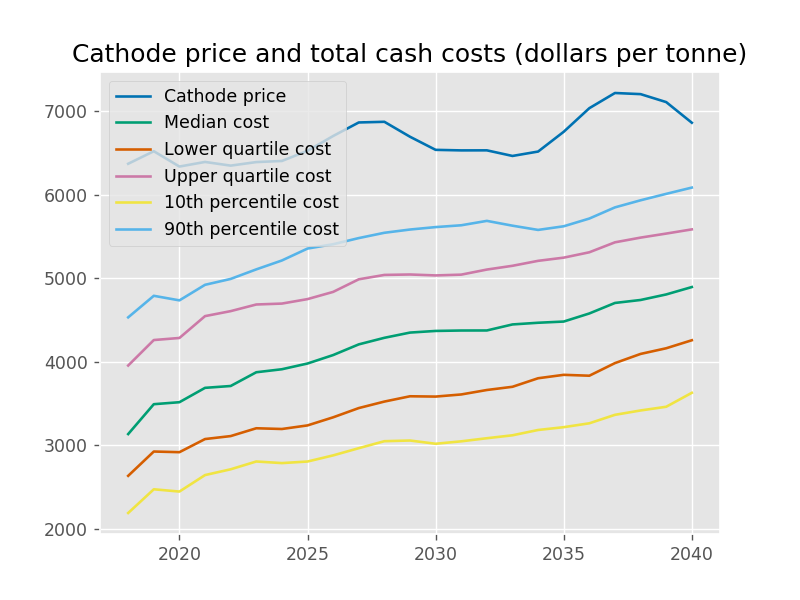

In [9]:
%matplotlib notebook
plt.style.use('seaborn-colorblind')
plt.plot(pd.Series(price_baseline_baseline.loc['20180101':, 'Cathode'].values, index=np.arange(2018, 2041)), label='Cathode price')
plt.plot(cost_series_median, label='Median cost')
plt.plot(cost_series_25, label='Lower quartile cost')
plt.plot(cost_series_75, label='Upper quartile cost')
plt.plot(cost_series_10, label='10th percentile cost')
plt.plot(cost_series_90, label='90th percentile cost')

plt.title('Cathode price and total cash costs (dollars per tonne)')
plt.legend()
plt.show()

In [14]:
minesite_average=mine_life_baseline_baseline.loc[:, idx[:, 'Recovered metal production (kt)']]\
.mul(mine_life_baseline_baseline.loc[:, idx[:, 'Minsite cost ($/tonne paid metal)']].values).sum(axis=1)\
.div(mine_life_baseline_baseline.loc[:, idx[:, 'Recovered metal production (kt)']].sum(axis=1))

In [15]:
tcrc_average=mine_life_baseline_baseline.loc[:, idx[:, 'Recovered metal production (kt)']]\
.mul(mine_life_baseline_baseline.loc[:, idx[:, 'TCRC ($/tonne paid metal)']].values).sum(axis=1)\
.div(mine_life_baseline_baseline.loc[:, idx[:, 'Recovered metal production (kt)']].sum(axis=1))

In [16]:
freight_average=mine_life_baseline_baseline.loc[:, idx[:, 'Recovered metal production (kt)']]\
.mul(mine_life_baseline_baseline.loc[:, idx[:, 'Frieght ($/tonne paid metal)']].values).sum(axis=1)\
.div(mine_life_baseline_baseline.loc[:, idx[:, 'Recovered metal production (kt)']].sum(axis=1))

In [17]:
royalty_average=mine_life_baseline_baseline.loc[:, idx[:, 'Recovered metal production (kt)']]\
.mul(mine_life_baseline_baseline.loc[:, idx[:, 'Royalty ($/tonne paid metal)']].values).sum(axis=1)\
.div(mine_life_baseline_baseline.loc[:, idx[:, 'Recovered metal production (kt)']].sum(axis=1))

<IPython.core.display.Javascript object>


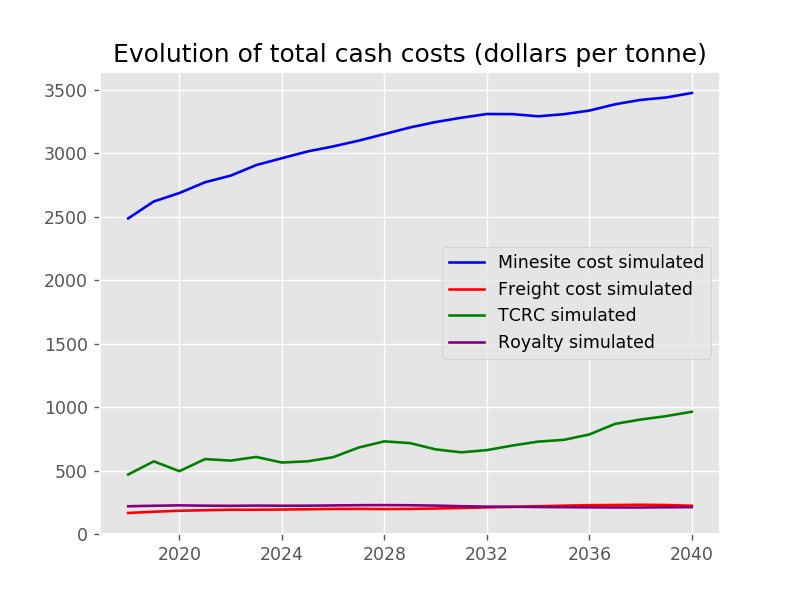

In [18]:
%matplotlib notebook
plt.plot(minesite_average, 'b', label='Minesite cost simulated')
plt.plot(freight_average, 'r', label='Freight cost simulated')
plt.plot(tcrc_average, 'g', label='TCRC simulated')
plt.plot(royalty_average, 'purple', label='Royalty simulated')

plt.title('Evolution of total cash costs (dollars per tonne)')
plt.legend()
plt.show()

# Cobalt behavior under different shocks

In [19]:
def dislpacement_estimate(sd_scenario, scrap_baseline, mining_baseline):
    scrap_supply_scenario=sd_scenario.loc['19600101':, 'Scrap production']
    mining_supply_scenario=sd_scenario.loc['19600101':, ['Concentrate production', 'SX-EW production']].sum(axis=1)
    shock_scenario=scrap_supply_scenario-scrap_baseline
    mining_response_scenario=mining_supply_scenario-mining_baseline
    displacement_scenario=mining_response_scenario.cumsum().div(shock_scenario.cumsum()).mul(-1)
    
    dis_results=pd.DataFrame({'Shock': shock_scenario, 'Mining response': mining_response_scenario, 
                              'Displacement': displacement_scenario})
    return dis_results

In [20]:
sd_baseline_baseline=pd.read_excel('Data/scenario results/S&D baseline_baseline.xlsx', 
                                   sheet_name='Sheet1', index_col=0)
scrap_supply_baseline_baseline=sd_baseline_baseline.loc['19600101':, 'Scrap production']
mining_supply_baseline_baseline=sd_baseline_baseline.loc['19600101':, ['Concentrate production', 'SX-EW production']].sum(axis=1)

In [21]:
sd_baseline_sm=pd.read_excel('Data/scenario results/S&D baseline_sm.xlsx', 
                             sheet_name='Sheet1', index_col=0)
shock_baseline_sm=dislpacement_estimate(sd_baseline_sm, 
                                        scrap_supply_baseline_baseline, mining_supply_baseline_baseline).loc[:, 'Shock']

In [22]:
sd_baseline_1=pd.read_excel('Data/scenario results/S&D baseline_1.xlsx', 
                             sheet_name='Sheet1', index_col=0)
shock_baseline_1=dislpacement_estimate(sd_baseline_1, 
                                        scrap_supply_baseline_baseline, mining_supply_baseline_baseline).loc[:, 'Shock']

In [23]:
sd_baseline_2=pd.read_excel('Data/scenario results/S&D baseline_2.xlsx', 
                             sheet_name='Sheet1', index_col=0)
shock_baseline_2=dislpacement_estimate(sd_baseline_2, 
                                        scrap_supply_baseline_baseline, mining_supply_baseline_baseline).loc[:, 'Shock']

In [24]:
sd_baseline_5=pd.read_excel('Data/scenario results/S&D baseline_5.xlsx', 
                             sheet_name='Sheet1', index_col=0)
shock_baseline_5=dislpacement_estimate(sd_baseline_5, 
                                        scrap_supply_baseline_baseline, mining_supply_baseline_baseline).loc[:, 'Shock']

In [25]:
sd_baseline_10=pd.read_excel('Data/scenario results/S&D baseline_10.xlsx', 
                             sheet_name='Sheet1', index_col=0)
shock_baseline_10=dislpacement_estimate(sd_baseline_10, 
                                        scrap_supply_baseline_baseline, mining_supply_baseline_baseline).loc[:, 'Shock']

## Baseline and scenarios

In [26]:
mine_life_baseline_baseline_tp=pd.read_excel('Data/scenario results/Mine level info/mine life baseline_baseline.xlsx', 
                                          sheet_name='Sheet1', index_col=[0, 1])
mine_life_baseline_baseline=mine_life_baseline_baseline_tp.transpose()

In [27]:
mine_life_baseline_sm_tp=pd.read_excel('Data/scenario results/Mine level info/mine life baseline_sm.xlsx', 
                                          sheet_name='Sheet1', index_col=[0, 1])
mine_life_baseline_sm=mine_life_baseline_sm_tp.transpose()

In [28]:
mine_life_baseline_1_tp=pd.read_excel('Data/scenario results/Mine level info/mine life baseline_1.xlsx', 
                                          sheet_name='Sheet1', index_col=[0, 1])
mine_life_baseline_1=mine_life_baseline_1_tp.transpose()

In [29]:
mine_life_baseline_2_tp=pd.read_excel('Data/scenario results/Mine level info/mine life baseline_2.xlsx', 
                                          sheet_name='Sheet1', index_col=[0, 1])
mine_life_baseline_2=mine_life_baseline_2_tp.transpose()

In [30]:
mine_life_baseline_5_tp=pd.read_excel('Data/scenario results/Mine level info/mine life baseline_5.xlsx', 
                                          sheet_name='Sheet1', index_col=[0, 1])
mine_life_baseline_5=mine_life_baseline_5_tp.transpose()

In [31]:
mine_life_baseline_10_tp=pd.read_excel('Data/scenario results/Mine level info/mine life baseline_10.xlsx', 
                                          sheet_name='Sheet1', index_col=[0, 1])
mine_life_baseline_10=mine_life_baseline_10_tp.transpose()

## Cobalt mining response

### Old mines

In [32]:
cu_co_mines=pd.read_excel('Cobalt/Mines affected.xlsx', sheet_name='Old mines', index_col=0)
cu_co_id=cu_co_mines.index
co_cu_ratio=cu_co_mines.loc[:, '2018 Co prod (kt)'].div(cu_co_mines.loc[:, '2018 Cu prod (kt)'])

Assuming that Co production will respond to the same Co-to-Cu ratio as in 2018

In [33]:
mine_life_response_baseline_sm_old=mine_life_baseline_sm.loc[:, idx[cu_co_id, 'Recovered metal production (kt)']]-\
mine_life_baseline_baseline.loc[:, idx[cu_co_id, 'Recovered metal production (kt)']]

mine_life_response_baseline_sm_old.columns=mine_life_response_baseline_sm_old.columns.get_level_values(0)
co_response_baseline_sm_old=mine_life_response_baseline_sm_old.mul(co_cu_ratio).sum(axis=1)

In [34]:
mine_life_response_baseline_1_old=mine_life_baseline_1.loc[:, idx[cu_co_id, 'Recovered metal production (kt)']]-\
mine_life_baseline_baseline.loc[:, idx[cu_co_id, 'Recovered metal production (kt)']]

mine_life_response_baseline_1_old.columns=mine_life_response_baseline_1_old.columns.get_level_values(0)
co_response_baseline_1_old=mine_life_response_baseline_1_old.mul(co_cu_ratio).sum(axis=1)

In [35]:
mine_life_response_baseline_2_old=mine_life_baseline_2.loc[:, idx[cu_co_id, 'Recovered metal production (kt)']]-\
mine_life_baseline_baseline.loc[:, idx[cu_co_id, 'Recovered metal production (kt)']]

mine_life_response_baseline_2_old.columns=mine_life_response_baseline_2_old.columns.get_level_values(0)
co_response_baseline_2_old=mine_life_response_baseline_2_old.mul(co_cu_ratio).sum(axis=1)

In [36]:
mine_life_response_baseline_5_old=mine_life_baseline_5.loc[:, idx[cu_co_id, 'Recovered metal production (kt)']]-\
mine_life_baseline_baseline.loc[:, idx[cu_co_id, 'Recovered metal production (kt)']]

mine_life_response_baseline_5_old.columns=mine_life_response_baseline_5_old.columns.get_level_values(0)
co_response_baseline_5_old=mine_life_response_baseline_5_old.mul(co_cu_ratio).sum(axis=1)

In [37]:
mine_life_response_baseline_10_old=mine_life_baseline_10.loc[:, idx[cu_co_id, 'Recovered metal production (kt)']]-\
mine_life_baseline_baseline.loc[:, idx[cu_co_id, 'Recovered metal production (kt)']]

mine_life_response_baseline_10_old.columns=mine_life_response_baseline_10_old.columns.get_level_values(0)
co_response_baseline_10_old=mine_life_response_baseline_10_old.mul(co_cu_ratio).sum(axis=1)

Marginal response

In [38]:
displacement_co_baseline_sm_old=-co_response_baseline_sm_old.cumsum().div(shock_baseline_sm.cumsum())
displacement_co_baseline_1_old=-co_response_baseline_1_old.cumsum().div(shock_baseline_1.cumsum())
displacement_co_baseline_2_old=-co_response_baseline_2_old.cumsum().div(shock_baseline_2.cumsum())
displacement_co_baseline_5_old=-co_response_baseline_5_old.cumsum().div(shock_baseline_5.cumsum())
displacement_co_baseline_10_old=-co_response_baseline_10_old.cumsum().div(shock_baseline_10.cumsum())

<IPython.core.display.Javascript object>


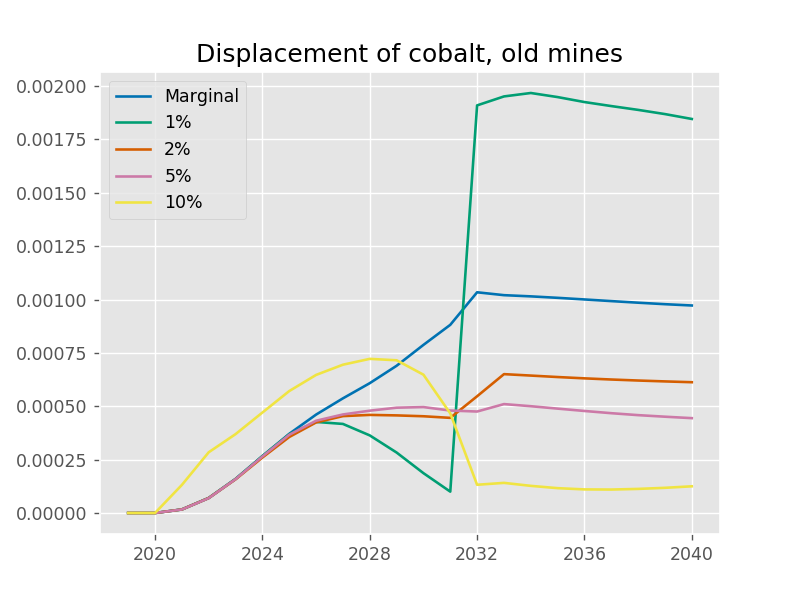

In [39]:
%matplotlib notebook
plt.plot(displacement_co_baseline_sm_old, label='Marginal')
plt.plot(displacement_co_baseline_1_old, label='1%')
plt.plot(displacement_co_baseline_2_old, label='2%')
plt.plot(displacement_co_baseline_5_old, label='5%')
plt.plot(displacement_co_baseline_10_old, label='10%')

plt.title('Displacement of cobalt, old mines')
plt.legend()
plt.show()

In [39]:
mine_life_baseline_baseline.loc[:, idx[cu_co_id, 'Recovered metal production (kt)']]

Mine ID,81253,28268,30531,36399,79271,29669,76076,28264,29830,31591,28371,80826
Values,Recovered metal production (kt),Recovered metal production (kt),Recovered metal production (kt),Recovered metal production (kt),Recovered metal production (kt),Recovered metal production (kt),Recovered metal production (kt),Recovered metal production (kt),Recovered metal production (kt),Recovered metal production (kt),Recovered metal production (kt),Recovered metal production (kt)
2018-01-01,0.261286,36.6046,10,24,149.175,8.06144,199.529,13.923,26,12.58,168.46,0.795
2019-01-01,0.261785,36.5153,9.00928,18.149,308.575,7.54187,168.321,0,21.1531,10.5889,153.829,0.754781
2020-01-01,0.260339,36.2889,8.56038,16.0358,266.852,7.32105,157.036,NaN,19.3364,9.76503,147.926,0.736847
2021-01-01,0.259502,36.1307,8.15475,14.3183,242.772,7.13554,147.735,NaN,17.8236,9.05419,142.811,0.721469
2022-01-01,0.258793,35.9872,7.78424,12.8948,226.172,3.28734,139.821,NaN,16.5376,8.43136,138.274,0.707761
2023-01-01,0.258577,35.9012,7.4463,11.7015,213.805,0,133.061,NaN,15.4356,7.88476,134.261,0.695787
2024-01-01,0.2588,35.8684,7.13701,10.6894,204.15,NaN,127.235,NaN,14.4817,7.40217,130.689,0.685309
2025-01-01,0.259457,35.8912,6.85354,9.82306,196.456,NaN,122.217,NaN,13.6504,6.975,127.508,0.676232
2026-01-01,0.260243,35.9348,6.59204,9.07325,190.138,NaN,117.829,NaN,12.9178,6.59332,124.636,0.668165


In [40]:
mine_life_baseline_1.loc[:, idx[cu_co_id, 'Recovered metal production (kt)']]

Mine ID,81253,28268,30531,36399,79271,29669,76076,28264,29830,31591,28371,80826
Values,Recovered metal production (kt),Recovered metal production (kt),Recovered metal production (kt),Recovered metal production (kt),Recovered metal production (kt),Recovered metal production (kt),Recovered metal production (kt),Recovered metal production (kt),Recovered metal production (kt),Recovered metal production (kt),Recovered metal production (kt),Recovered metal production (kt)
2018-01-01,0.261286,36.6046,10,24,149.175,8.06144,199.529,13.923,26,12.58,168.46,0.795
2019-01-01,0.261785,36.5153,9.00928,18.149,308.575,7.54187,168.321,0,21.1531,10.5889,153.829,0.754781
2020-01-01,0.260339,36.2889,8.56038,16.0358,266.852,7.32105,157.036,NaN,19.3364,9.76503,147.926,0.736847
2021-01-01,0.259476,36.1277,8.15462,14.318,242.763,7.13515,147.729,NaN,17.8232,9.05395,142.808,0.721445
2022-01-01,0.25871,35.9777,7.78384,12.8941,226.141,3.28734,139.803,NaN,16.5364,8.43063,138.263,0.707683
2023-01-01,0.258445,35.886,7.4457,11.7005,213.752,0,133.029,NaN,15.4337,7.88359,134.244,0.695662
2024-01-01,0.258653,35.8512,7.13634,10.6882,204.085,NaN,127.196,NaN,14.4795,7.40082,130.669,0.685162
2025-01-01,0.259329,35.8758,6.85293,9.82203,196.393,NaN,122.179,NaN,13.6485,6.97375,127.489,0.676093
2026-01-01,0.260171,35.926,6.5917,9.07274,190.1,NaN,117.806,NaN,12.9167,6.59265,124.625,0.668082


### New mines

Assuming some co_cu_ratio for all new mines (starting with 'Inc'), which is not constant... But doing so allows us to calibrate to future cobalt mining benchmark

In [77]:
old_cu_prod=mine_life_baseline_baseline.loc[:, idx[cu_co_id, 'Recovered metal production (kt)']].copy()
old_cu_prod.columns=old_cu_prod.columns.get_level_values(0)

old_co_prod_total=old_cu_prod.mul(co_cu_ratio).sum(axis=1)

In [78]:
future_co_prod_total=pd.read_excel('Cobalt/Mines affected.xlsx', sheet_name='New mines', index_col=0)
new_co_prod_total_cali=(future_co_prod_total.iloc[:, 0].div(1e3)-old_co_prod_total)
new_cu_prod=mine_life_baseline_baseline.loc[:, idx[:, 'Recovered metal production (kt)']].iloc[:, 430:].sum(axis=1)

new_co_cu_ratio=new_co_prod_total_cali.div(new_cu_prod)

In [79]:
mine_life_response_baseline_sm_new=mine_life_baseline_sm.loc[:, idx[:, 'Recovered metal production (kt)']].iloc[:, 430:].sum(axis=1)-\
mine_life_baseline_baseline.loc[:, idx[:, 'Recovered metal production (kt)']].iloc[:, 430:].sum(axis=1)

co_response_baseline_sm_new=mine_life_response_baseline_sm_new.mul(new_co_cu_ratio, axis=0)

In [80]:
mine_life_response_baseline_1_new=mine_life_baseline_1.loc[:, idx[:, 'Recovered metal production (kt)']].iloc[:, 430:].sum(axis=1)-\
mine_life_baseline_baseline.loc[:, idx[:, 'Recovered metal production (kt)']].iloc[:, 430:].sum(axis=1)

co_response_baseline_1_new=mine_life_response_baseline_1_new.mul(new_co_cu_ratio, axis=0)

In [81]:
mine_life_response_baseline_2_new=mine_life_baseline_2.loc[:, idx[:, 'Recovered metal production (kt)']].iloc[:, 430:].sum(axis=1)-\
mine_life_baseline_baseline.loc[:, idx[:, 'Recovered metal production (kt)']].iloc[:, 430:].sum(axis=1)

co_response_baseline_2_new=mine_life_response_baseline_2_new.mul(new_co_cu_ratio, axis=0)

In [82]:
mine_life_response_baseline_5_new=mine_life_baseline_5.loc[:, idx[:, 'Recovered metal production (kt)']].iloc[:, 430:].sum(axis=1)-\
mine_life_baseline_baseline.loc[:, idx[:, 'Recovered metal production (kt)']].iloc[:, 430:].sum(axis=1)

co_response_baseline_5_new=mine_life_response_baseline_5_new.mul(new_co_cu_ratio, axis=0)

In [83]:
mine_life_response_baseline_10_new=mine_life_baseline_10.loc[:, idx[:, 'Recovered metal production (kt)']].iloc[:, 430:].sum(axis=1)-\
mine_life_baseline_baseline.loc[:, idx[:, 'Recovered metal production (kt)']].iloc[:, 430:].sum(axis=1)
# 430 is start of incentive mines
co_response_baseline_10_new=mine_life_response_baseline_10_new.mul(new_co_cu_ratio, axis=0)

In [84]:
displacement_co_baseline_sm_new=-co_response_baseline_sm_new.cumsum().div(shock_baseline_sm.cumsum())
displacement_co_baseline_1_new=-co_response_baseline_1_new.cumsum().div(shock_baseline_1.cumsum())
displacement_co_baseline_2_new=-co_response_baseline_2_new.cumsum().div(shock_baseline_2.cumsum())
displacement_co_baseline_5_new=-co_response_baseline_5_new.cumsum().div(shock_baseline_5.cumsum())
displacement_co_baseline_10_new=-co_response_baseline_10_new.cumsum().div(shock_baseline_10.cumsum())

In [85]:
displacement_co_baseline_sm_all=displacement_co_baseline_sm_old+displacement_co_baseline_sm_new
displacement_co_baseline_1_all=displacement_co_baseline_1_old+displacement_co_baseline_1_new
displacement_co_baseline_2_all=displacement_co_baseline_2_old+displacement_co_baseline_2_new
displacement_co_baseline_5_all=displacement_co_baseline_5_old+displacement_co_baseline_5_new
displacement_co_baseline_10_all=displacement_co_baseline_10_old+displacement_co_baseline_10_new

<IPython.core.display.Javascript object>


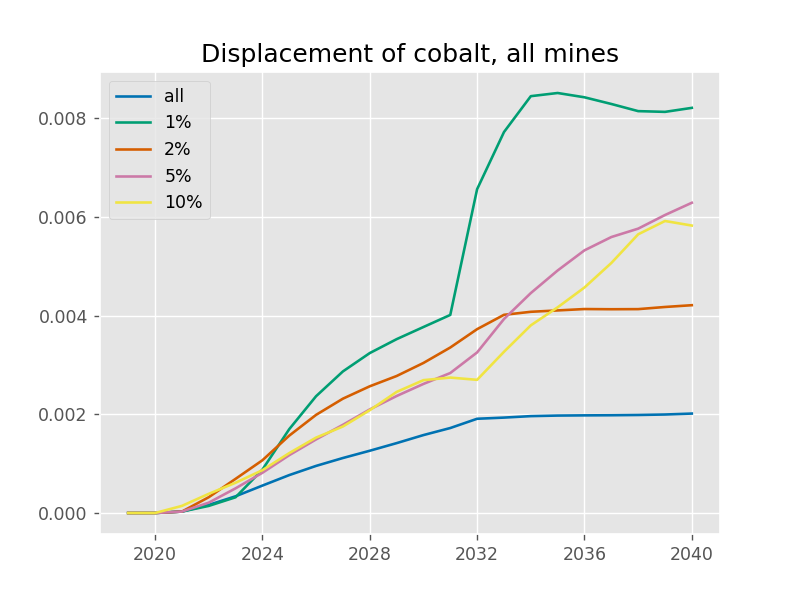

In [94]:
%matplotlib notebook
plt.plot(displacement_co_baseline_sm_all, label='all')
plt.plot(displacement_co_baseline_1_all, label='1%')
plt.plot(displacement_co_baseline_2_all, label='2%')
plt.plot(displacement_co_baseline_5_all, label='5%')
plt.plot(displacement_co_baseline_10_all, label='10%')

plt.title('Displacement of cobalt, all mines')
plt.legend()
plt.show()

In [51]:
co_response_baseline_10_new.cumsum()+co_response_baseline_10_old.cumsum()

2018-01-01         NaN
2019-01-01    0.000000
2020-01-01    0.000000
2021-01-01   -0.177672
2022-01-01   -0.479774
2023-01-01   -0.758378
2024-01-01   -1.077153
2025-01-01   -1.514833
2026-01-01   -1.917996
2027-01-01   -2.213491
2028-01-01   -2.643417
2029-01-01   -3.126690
2030-01-01   -3.443226
2031-01-01   -3.519906
2032-01-01   -3.467807
2033-01-01   -4.203406
2034-01-01   -4.902253
2035-01-01   -5.388577
2036-01-01   -5.928470
2037-01-01   -6.595835
2038-01-01   -7.375736
2039-01-01   -7.748684
2040-01-01   -7.639371
dtype: float64

## Cobalt co-producing mines on the cost curve

In [87]:
x_pos_co=cc_18.loc[:, 'Cumulative production'].shift(1).fillna(0).loc[cu_co_id]
width_co=cc_18.loc[:, 'Cumulative production'].diff().fillna(cc_18.loc[:, 'Cumulative production'].iloc[0]).loc[cu_co_id]
minesite_co=cc_18.loc[:, 'Minsite cost ($/tonne paid metal)'].loc[cu_co_id]
freight_co=cc_18.loc[:, 'Frieght ($/tonne paid metal)'].loc[cu_co_id]
tcrc_co=cc_18.loc[:, 'TCRC ($/tonne paid metal)'].loc[cu_co_id]
royalty_co=cc_18.loc[:, 'Royalty ($/tonne paid metal)'].loc[cu_co_id]
cathode_price=price_baseline_baseline.loc['20180101', 'Cathode']

<IPython.core.display.Javascript object>


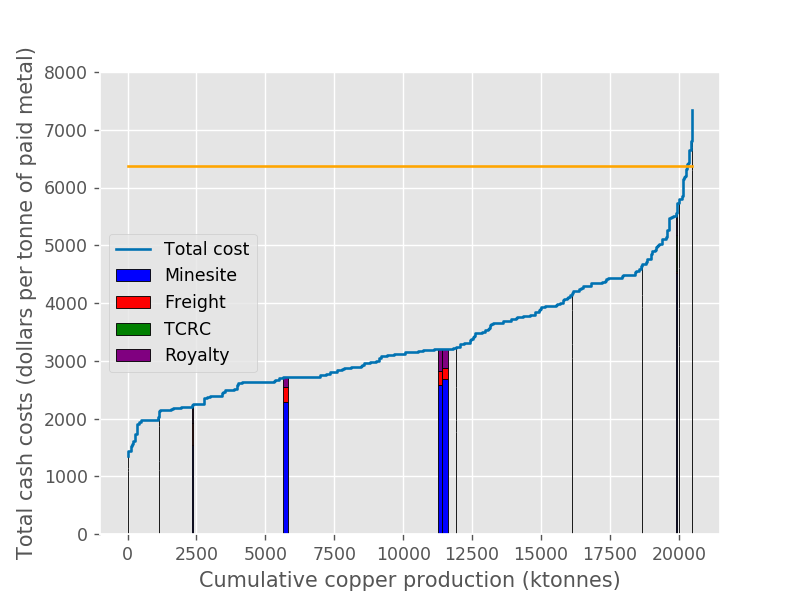

In [127]:
%matplotlib notebook
plt.step(cc_18.loc[:, 'Cumulative production'].shift(1).fillna(0), cc_18.loc[:, 'Total cost'], where='post')
plt.bar(x_pos_co, minesite_co, color='b', align='edge', edgecolor='black', width=width_co, 
        linewidth=0.5, label='Minesite')
plt.bar(x_pos_co, freight_co, color='r', align='edge', edgecolor='black', width=width_co, 
        bottom=minesite_co, linewidth=0.5, label='Freight')
plt.bar(x_pos_co, tcrc_co, color='g', align='edge', edgecolor='black', width=width_co, 
        bottom=minesite_co+freight_co, linewidth=0.5, label='TCRC')
plt.bar(x_pos_co, royalty_co, color='purple', align='edge', edgecolor='black', width=width_co, 
        bottom=minesite_co+freight_co+tcrc_co, linewidth=0.5, label='Royalty')

plt.plot([0, x_pos.iloc[-1]], [cathode_price, cathode_price], color='orange')
# plt.title('2018 Cost curve (Total cash costs, co-product basis)')
plt.xlabel('Cumulative copper production (ktonnes)')
plt.ylabel('Total cash costs (dollars per tonne of paid metal)')
plt.axis([-1000, x_pos.iloc[-1]+1000, 0, 8000])
plt.legend()
plt.show()

# Tellurium (refinery behavior) under different shocks

Question to ask: how much primary refinery production is avoided due to scrap supply shocks?

## Baseline and scenarios

In [53]:
sd_baseline_baseline=pd.read_excel('Data/scenario results/S&D baseline_baseline.xlsx', 
                                   sheet_name='Sheet1', index_col=0)

In [54]:
sd_baseline_sm=pd.read_excel('Data/scenario results/S&D baseline_sm.xlsx', 
                             sheet_name='Sheet1', index_col=0)
sd_baseline_1=pd.read_excel('Data/scenario results/S&D baseline_1.xlsx', 
                             sheet_name='Sheet1', index_col=0)
sd_baseline_2=pd.read_excel('Data/scenario results/S&D baseline_2.xlsx', 
                             sheet_name='Sheet1', index_col=0)
sd_baseline_5=pd.read_excel('Data/scenario results/S&D baseline_5.xlsx', 
                             sheet_name='Sheet1', index_col=0)
sd_baseline_10=pd.read_excel('Data/scenario results/S&D baseline_10.xlsx', 
                             sheet_name='Sheet1', index_col=0)

In [55]:
shock_baseline_sm=dislpacement_estimate(sd_baseline_sm, 
                                        scrap_supply_baseline_baseline, mining_supply_baseline_baseline).loc[:, 'Shock']
shock_baseline_1=dislpacement_estimate(sd_baseline_1, 
                                        scrap_supply_baseline_baseline, mining_supply_baseline_baseline).loc[:, 'Shock']
shock_baseline_2=dislpacement_estimate(sd_baseline_2, 
                                        scrap_supply_baseline_baseline, mining_supply_baseline_baseline).loc[:, 'Shock']
shock_baseline_5=dislpacement_estimate(sd_baseline_5, 
                                        scrap_supply_baseline_baseline, mining_supply_baseline_baseline).loc[:, 'Shock']
shock_baseline_10=dislpacement_estimate(sd_baseline_10, 
                                        scrap_supply_baseline_baseline, mining_supply_baseline_baseline).loc[:, 'Shock']

## Primary mining displacement

In [56]:
mine_dis_baseline_sm=dislpacement_estimate(sd_baseline_sm, 
                                        scrap_supply_baseline_baseline, mining_supply_baseline_baseline).loc[:, 'Displacement']
mine_dis_baseline_1=dislpacement_estimate(sd_baseline_1, 
                                        scrap_supply_baseline_baseline, mining_supply_baseline_baseline).loc[:, 'Displacement']
mine_dis_baseline_2=dislpacement_estimate(sd_baseline_2, 
                                        scrap_supply_baseline_baseline, mining_supply_baseline_baseline).loc[:, 'Displacement']
mine_dis_baseline_5=dislpacement_estimate(sd_baseline_5, 
                                        scrap_supply_baseline_baseline, mining_supply_baseline_baseline).loc[:, 'Displacement']
mine_dis_baseline_10=dislpacement_estimate(sd_baseline_10, 
                                        scrap_supply_baseline_baseline, mining_supply_baseline_baseline).loc[:, 'Displacement']

<IPython.core.display.Javascript object>


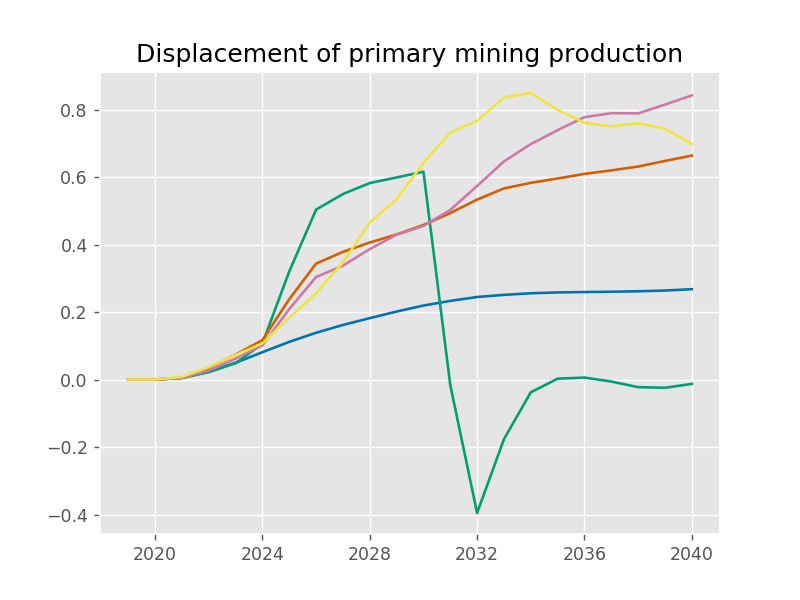

In [57]:
%matplotlib notebook
plt.plot(mine_dis_baseline_sm.loc['20180101':], label='Marginal')
plt.plot(mine_dis_baseline_1.loc['20180101':], label='1%')
plt.plot(mine_dis_baseline_2.loc['20180101':], label='2%')
plt.plot(mine_dis_baseline_5.loc['20180101':], label='5%')
plt.plot(mine_dis_baseline_10.loc['20180101':], label='10%')

#plt.legend()
plt.title('Displacement of primary mining production')
plt.show()

## Primary refined displacement

In [58]:
pri_ref_response_baseline_sm=sd_baseline_sm.loc['19600101':, 'Primary refining production']-\
sd_baseline_baseline.loc['19600101':, 'Primary refining production']

pri_ref_response_baseline_1=sd_baseline_1.loc['19600101':, 'Primary refining production']-\
sd_baseline_baseline.loc['19600101':, 'Primary refining production']

pri_ref_response_baseline_2=sd_baseline_2.loc['19600101':, 'Primary refining production']-\
sd_baseline_baseline.loc['19600101':, 'Primary refining production']

pri_ref_response_baseline_5=sd_baseline_5.loc['19600101':, 'Primary refining production']-\
sd_baseline_baseline.loc['19600101':, 'Primary refining production']

pri_ref_response_baseline_10=sd_baseline_10.loc['19600101':, 'Primary refining production']-\
sd_baseline_baseline.loc['19600101':, 'Primary refining production']

In [59]:
displacement_pri_ref_baseline_sm=-pri_ref_response_baseline_sm.loc['20190101':].cumsum()\
.div(shock_baseline_sm.loc['20190101':].cumsum())

displacement_pri_ref_baseline_1=-pri_ref_response_baseline_1.loc['20190101':].cumsum()\
.div(shock_baseline_1.loc['20190101':].cumsum())

displacement_pri_ref_baseline_2=-pri_ref_response_baseline_2.loc['20190101':].cumsum()\
.div(shock_baseline_2.loc['20190101':].cumsum())

displacement_pri_ref_baseline_5=-pri_ref_response_baseline_5.loc['20190101':].cumsum()\
.div(shock_baseline_5.loc['20190101':].cumsum())

displacement_pri_ref_baseline_10=-pri_ref_response_baseline_10.loc['20190101':].cumsum()\
.div(shock_baseline_10.loc['20190101':].cumsum())

<IPython.core.display.Javascript object>


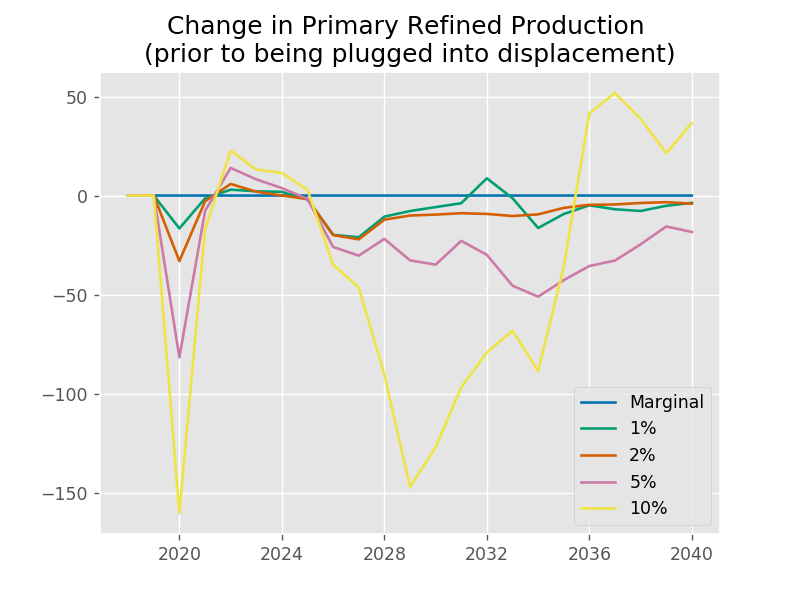

In [116]:
%matplotlib notebook
plt.plot(pri_ref_response_baseline_sm.loc['20180101':], label='Marginal')
plt.plot(pri_ref_response_baseline_1.loc['20180101':], label='1%')
plt.plot(pri_ref_response_baseline_2.loc['20180101':], label='2%')
plt.plot(pri_ref_response_baseline_5.loc['20180101':], label='5%')
plt.plot(pri_ref_response_baseline_10.loc['20180101':], label='10%')
plt.legend()
plt.title('Change in Primary Refined Production \n(prior to being plugged into displacement)')
plt.show()

<IPython.core.display.Javascript object>


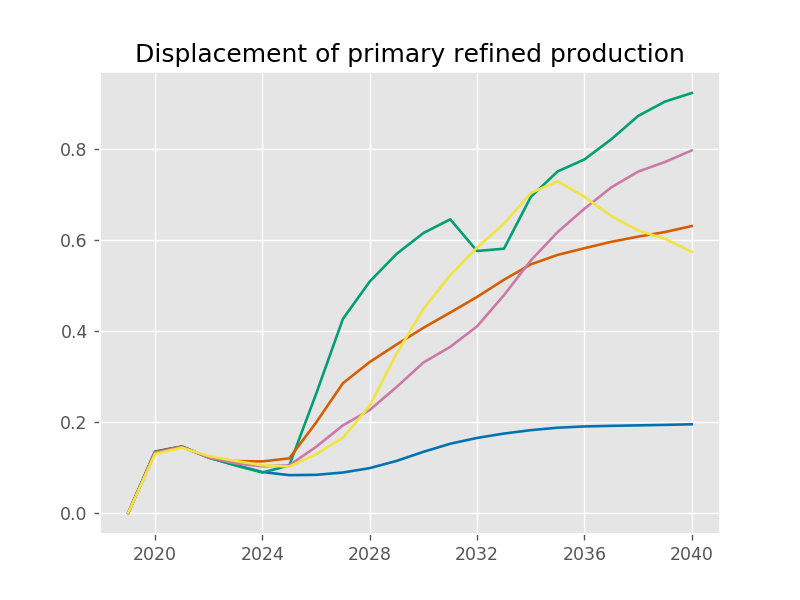

In [60]:
%matplotlib notebook
plt.plot(displacement_pri_ref_baseline_sm.loc['20180101':], label='Marginal')
plt.plot(displacement_pri_ref_baseline_1.loc['20180101':], label='1%')
plt.plot(displacement_pri_ref_baseline_2.loc['20180101':], label='2%')
plt.plot(displacement_pri_ref_baseline_5.loc['20180101':], label='5%')
plt.plot(displacement_pri_ref_baseline_10.loc['20180101':], label='10%')

#plt.legend()
plt.title('Displacement of primary refined production')
plt.show()

## Secondary refined displacement

In [61]:
sec_ref_response_baseline_sm=sd_baseline_sm.loc['19600101':, 'Secondary refining production']-\
sd_baseline_baseline.loc['19600101':, 'Secondary refining production']

sec_ref_response_baseline_1=sd_baseline_1.loc['19600101':, 'Secondary refining production']-\
sd_baseline_baseline.loc['19600101':, 'Secondary refining production']

sec_ref_response_baseline_2=sd_baseline_2.loc['19600101':, 'Secondary refining production']-\
sd_baseline_baseline.loc['19600101':, 'Secondary refining production']

sec_ref_response_baseline_5=sd_baseline_5.loc['19600101':, 'Secondary refining production']-\
sd_baseline_baseline.loc['19600101':, 'Secondary refining production']

sec_ref_response_baseline_10=sd_baseline_10.loc['19600101':, 'Secondary refining production']-\
sd_baseline_baseline.loc['19600101':, 'Secondary refining production']

In [62]:
displacement_sec_ref_baseline_sm=-sec_ref_response_baseline_sm.loc['20190101':].cumsum()\
.div(shock_baseline_sm.loc['20190101':].cumsum())

displacement_sec_ref_baseline_1=-sec_ref_response_baseline_1.loc['20190101':].cumsum()\
.div(shock_baseline_1.loc['20190101':].cumsum())

displacement_sec_ref_baseline_2=-sec_ref_response_baseline_2.loc['20190101':].cumsum()\
.div(shock_baseline_2.loc['20190101':].cumsum())

displacement_sec_ref_baseline_5=-sec_ref_response_baseline_5.loc['20190101':].cumsum()\
.div(shock_baseline_5.loc['20190101':].cumsum())

displacement_sec_ref_baseline_10=-sec_ref_response_baseline_10.loc['20190101':].cumsum()\
.div(shock_baseline_10.loc['20190101':].cumsum())

<IPython.core.display.Javascript object>


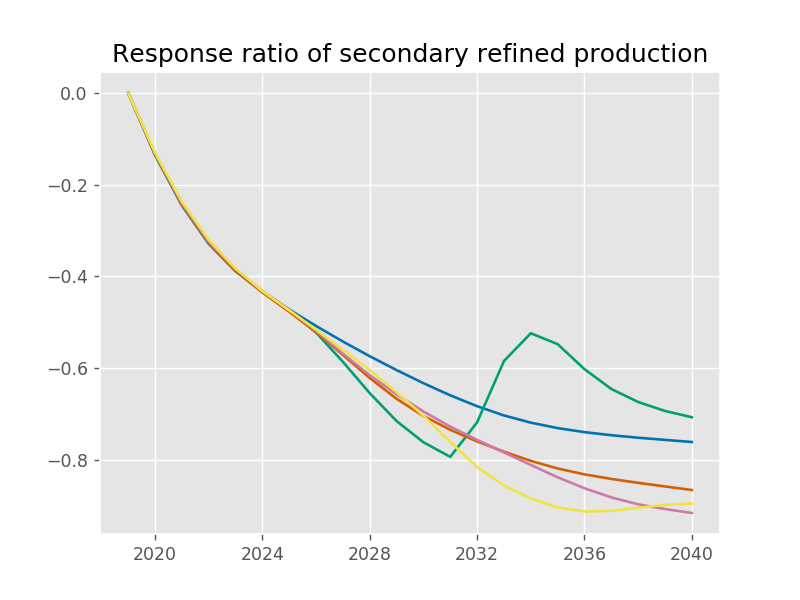

In [63]:
%matplotlib notebook
plt.plot(displacement_sec_ref_baseline_sm.loc['20180101':], label='Marginal')
plt.plot(displacement_sec_ref_baseline_1.loc['20180101':], label='1%')
plt.plot(displacement_sec_ref_baseline_2.loc['20180101':], label='2%')
plt.plot(displacement_sec_ref_baseline_5.loc['20180101':], label='5%')
plt.plot(displacement_sec_ref_baseline_10.loc['20180101':], label='10%')

#plt.legend()
plt.title('Response ratio of secondary refined production')
plt.show()

## All cathode production displacement

In [64]:
all_ref_response_baseline_sm=sd_baseline_sm.iloc[10:, 3:5].sum(axis=1)-sd_baseline_baseline.iloc[10:, 3:5].sum(axis=1)
all_ref_response_baseline_1=sd_baseline_1.iloc[10:, 3:5].sum(axis=1)-sd_baseline_baseline.iloc[10:, 3:5].sum(axis=1)
all_ref_response_baseline_2=sd_baseline_2.iloc[10:, 3:5].sum(axis=1)-sd_baseline_baseline.iloc[10:, 3:5].sum(axis=1)
all_ref_response_baseline_5=sd_baseline_5.iloc[10:, 3:5].sum(axis=1)-sd_baseline_baseline.iloc[10:, 3:5].sum(axis=1)
all_ref_response_baseline_10=sd_baseline_10.iloc[10:, 3:5].sum(axis=1)-sd_baseline_baseline.iloc[10:, 3:5].sum(axis=1)

In [65]:
displacement_all_ref_baseline_sm=-all_ref_response_baseline_sm.loc['20190101':].cumsum()\
.div(shock_baseline_sm.loc['20190101':].cumsum())

displacement_all_ref_baseline_1=-all_ref_response_baseline_1.loc['20190101':].cumsum()\
.div(shock_baseline_1.loc['20190101':].cumsum())

displacement_all_ref_baseline_2=-all_ref_response_baseline_2.loc['20190101':].cumsum()\
.div(shock_baseline_2.loc['20190101':].cumsum())

displacement_all_ref_baseline_5=-all_ref_response_baseline_5.loc['20190101':].cumsum()\
.div(shock_baseline_5.loc['20190101':].cumsum())

displacement_all_ref_baseline_10=-all_ref_response_baseline_10.loc['20190101':].cumsum()\
.div(shock_baseline_10.loc['20190101':].cumsum())

<IPython.core.display.Javascript object>


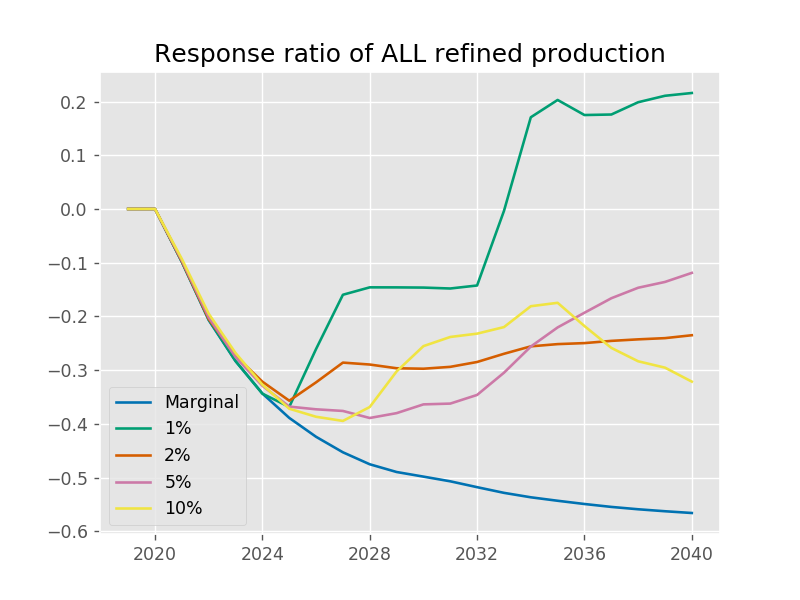

In [118]:
%matplotlib notebook
plt.plot(displacement_all_ref_baseline_sm.loc['20180101':], label='Marginal')
plt.plot(displacement_all_ref_baseline_1.loc['20180101':], label='1%')
plt.plot(displacement_all_ref_baseline_2.loc['20180101':], label='2%')
plt.plot(displacement_all_ref_baseline_5.loc['20180101':], label='5%')
plt.plot(displacement_all_ref_baseline_10.loc['20180101':], label='10%')

plt.legend()
plt.title('Response ratio of ALL refined production')
plt.show()

## Refined usage displacement

In [67]:
ref_use_response_baseline_sm=sd_baseline_sm.iloc[10:, 6]-sd_baseline_baseline.iloc[10:, 6]
ref_use_response_baseline_1=sd_baseline_1.iloc[10:, 6]-sd_baseline_baseline.iloc[10:, 6]
ref_use_response_baseline_2=sd_baseline_2.iloc[10:, 6]-sd_baseline_baseline.iloc[10:, 6]
ref_use_response_baseline_5=sd_baseline_5.iloc[10:, 6]-sd_baseline_baseline.iloc[10:, 6]
ref_use_response_baseline_10=sd_baseline_10.iloc[10:, 6]-sd_baseline_baseline.iloc[10:, 6]

In [68]:
displacement_ref_use_baseline_sm=-ref_use_response_baseline_sm.loc['20190101':].cumsum()\
.div(shock_baseline_sm.loc['20190101':].cumsum())

displacement_ref_use_baseline_1=-ref_use_response_baseline_1.loc['20190101':].cumsum()\
.div(shock_baseline_1.loc['20190101':].cumsum())

displacement_ref_use_baseline_2=-ref_use_response_baseline_2.loc['20190101':].cumsum()\
.div(shock_baseline_2.loc['20190101':].cumsum())

displacement_ref_use_baseline_5=-ref_use_response_baseline_5.loc['20190101':].cumsum()\
.div(shock_baseline_5.loc['20190101':].cumsum())

displacement_ref_use_baseline_10=-ref_use_response_baseline_10.loc['20190101':].cumsum()\
.div(shock_baseline_10.loc['20190101':].cumsum())

<IPython.core.display.Javascript object>


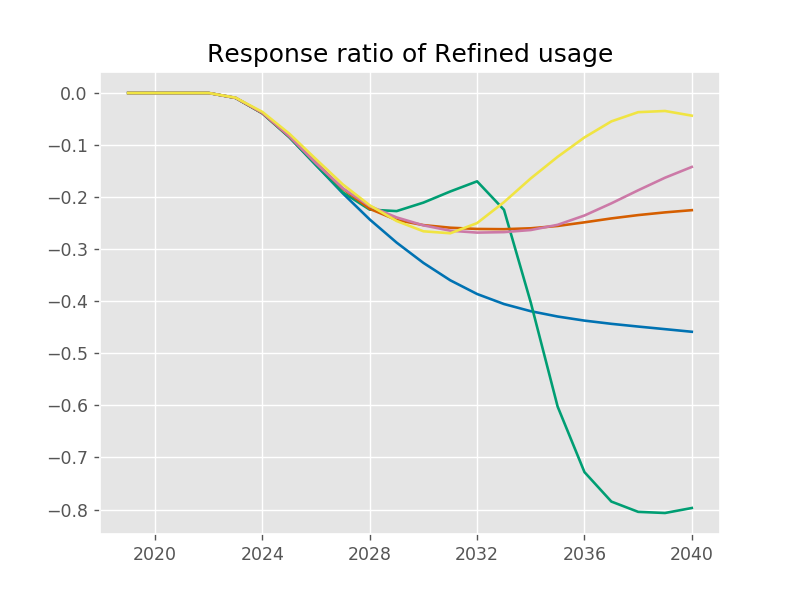

In [69]:
%matplotlib notebook
plt.plot(displacement_ref_use_baseline_sm.loc['20180101':], label='Marginal')
plt.plot(displacement_ref_use_baseline_1.loc['20180101':], label='1%')
plt.plot(displacement_ref_use_baseline_2.loc['20180101':], label='2%')
plt.plot(displacement_ref_use_baseline_5.loc['20180101':], label='5%')
plt.plot(displacement_ref_use_baseline_10.loc['20180101':], label='10%')

#plt.legend()
plt.title('Response ratio of Refined usage')
plt.show()

## Direct melt displacement

In [70]:
displacement_dm_use_baseline_sm=-(sd_baseline_sm.iloc[69:, 8]-sd_baseline_baseline.iloc[69:, 8]).cumsum()\
.div(shock_baseline_sm.loc['20190101':].cumsum())
displacement_dm_use_baseline_1=-(sd_baseline_1.iloc[69:, 8]-sd_baseline_baseline.iloc[69:, 8]).cumsum()\
.div(shock_baseline_1.loc['20190101':].cumsum())
displacement_dm_use_baseline_2=-(sd_baseline_2.iloc[69:, 8]-sd_baseline_baseline.iloc[69:, 8]).cumsum()\
.div(shock_baseline_2.loc['20190101':].cumsum())
displacement_dm_use_baseline_5=-(sd_baseline_5.iloc[69:, 8]-sd_baseline_baseline.iloc[69:, 8]).cumsum()\
.div(shock_baseline_5.loc['20190101':].cumsum())
displacement_dm_use_baseline_10=-(sd_baseline_10.iloc[69:, 8]-sd_baseline_baseline.iloc[69:, 8]).cumsum()\
.div(shock_baseline_10.loc['20190101':].cumsum())

## All demand displacement

In [71]:
displacement_all_use_baseline_sm=displacement_dm_use_baseline_sm+displacement_ref_use_baseline_sm
displacement_all_use_baseline_1=displacement_dm_use_baseline_1+displacement_ref_use_baseline_1
displacement_all_use_baseline_2=displacement_dm_use_baseline_2+displacement_ref_use_baseline_2
displacement_all_use_baseline_5=displacement_dm_use_baseline_5+displacement_ref_use_baseline_5
displacement_all_use_baseline_10=displacement_dm_use_baseline_10+displacement_ref_use_baseline_10

<IPython.core.display.Javascript object>


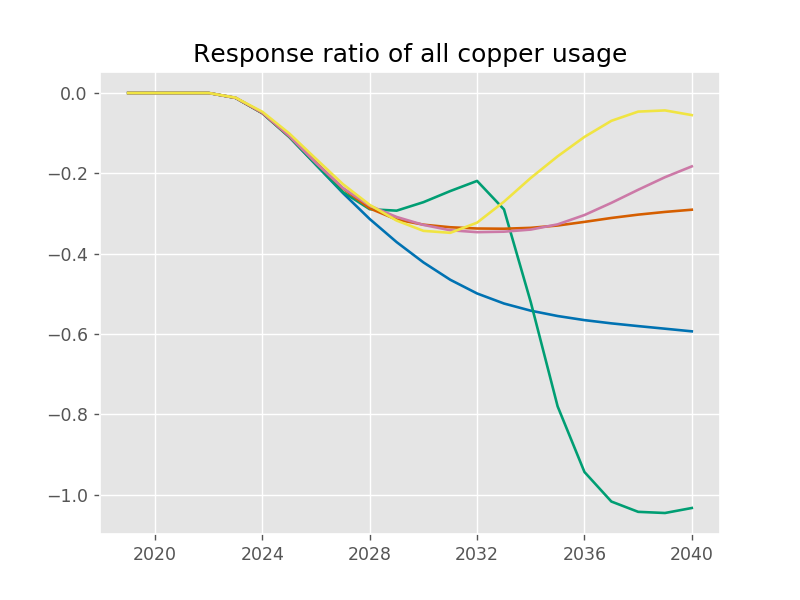

In [72]:
%matplotlib notebook
plt.plot(displacement_all_use_baseline_sm.loc['20180101':], label='Marginal')
plt.plot(displacement_all_use_baseline_1.loc['20180101':], label='1%')
plt.plot(displacement_all_use_baseline_2.loc['20180101':], label='2%')
plt.plot(displacement_all_use_baseline_5.loc['20180101':], label='5%')
plt.plot(displacement_all_use_baseline_10.loc['20180101':], label='10%')

#plt.legend()
plt.title('Response ratio of all copper usage')
plt.show()

## Supply potentials

In [73]:
sup_pot_file=pd.read_excel('Te&Se/Supply potential estimate.xlsx', sheet_name='Estimate', index_col=0)
sup_pot_file.index=pd.date_range('19600101', '20180101', freq='AS')

te_cu_ratio=0.105
se_cu_ratio=0.4

In [74]:
te_se_projection=pd.read_excel('Te&Se/Supply potential estimate.xlsx', sheet_name='Projection', index_col=0)
te_se_projection.index=pd.date_range('20170101', '20400101', freq='AS')

te_high=te_se_projection.loc[:, 'Te high']
te_med=te_se_projection.loc[:, 'Te medium']
te_low=te_se_projection.loc[:, 'Te low']

se_high=te_se_projection.loc[:, 'Se high']
se_med=te_se_projection.loc[:, 'Se medium']
se_low=te_se_projection.loc[:, 'Se low']

<IPython.core.display.Javascript object>


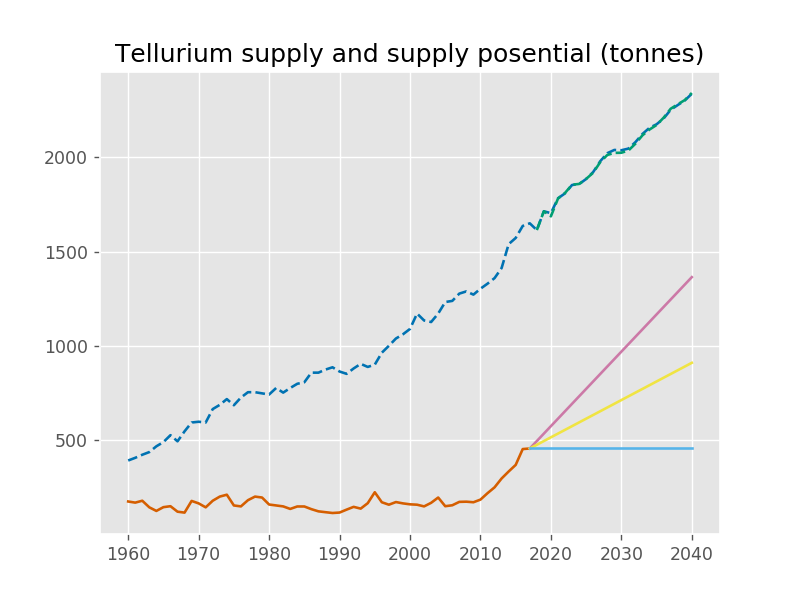

In [75]:
%matplotlib notebook
plt.plot(sd_baseline_baseline.loc['19600101':, 'Primary refining production'].mul(te_cu_ratio), '--',
         label='Baseline')
plt.plot(sd_baseline_10.loc['20180101':, 'Primary refining production'].mul(te_cu_ratio), '--',
         label='10%')
plt.plot(sup_pot_file.loc[:, 'Te production (t)'])
plt.plot(te_high)
plt.plot(te_med)
plt.plot(te_low)

plt.title('Tellurium supply and supply posential (tonnes)')
plt.show()

In [160]:
(sd_baseline_10.loc['19600101':, 'Primary refining production'].mul(te_cu_ratio)-\
sd_baseline_baseline.loc['19600101':, 'Primary refining production'].mul(te_cu_ratio)).cumsum()

1960-01-01     0.000000
1961-01-01     0.000000
1962-01-01     0.000000
1963-01-01     0.000000
1964-01-01     0.000000
1965-01-01     0.000000
1966-01-01     0.000000
1967-01-01     0.000000
1968-01-01     0.000000
1969-01-01     0.000000
1970-01-01     0.000000
1971-01-01     0.000000
1972-01-01     0.000000
1973-01-01     0.000000
1974-01-01     0.000000
1975-01-01     0.000000
1976-01-01     0.000000
1977-01-01     0.000000
1978-01-01     0.000000
1979-01-01     0.000000
1980-01-01     0.000000
1981-01-01     0.000000
1982-01-01     0.000000
1983-01-01     0.000000
1984-01-01     0.000000
1985-01-01     0.000000
1986-01-01     0.000000
1987-01-01     0.000000
1988-01-01     0.000000
1989-01-01     0.000000
                ...    
2011-01-01     0.000000
2012-01-01     0.000000
2013-01-01     0.000000
2014-01-01     0.000000
2015-01-01     0.000000
2016-01-01     0.000000
2017-01-01     0.000000
2018-01-01     0.000000
2019-01-01     0.000000
2020-01-01   -16.829039
2021-01-01   -18

In [76]:
(sd_baseline_baseline.loc['20190101':, 'Primary refining production'].mul(te_cu_ratio)).sum()

44577.884567455396